# Lab2 Exercise

According to Lab materials, we can do some exercise.

# Firstly, you can change the linear function to a nonlinear function, like x^2, x^3...; Then using (mini) Batch Gradient Descent or Stochastic Gradient Descend (SGD), to check the loss curve.

Predict before training with BGD: 4.0 tensor(-60., grad_fn=<AddBackward0>)
iteration: 0, 	 loss: 1668.4052734375, 	 weight: 6.442094802856445, 	 bias: -14.385093688964844
iteration: 5, 	 loss: 155.67562866210938, 	 weight: -0.9414105415344238, 	 bias: 0.891693115234375
iteration: 10, 	 loss: 64.78903198242188, 	 weight: 0.05552437901496887, 	 bias: 5.886476516723633
iteration: 15, 	 loss: 56.27119064331055, 	 weight: -0.06802926957607269, 	 bias: 7.524876594543457
iteration: 20, 	 loss: 55.37798309326172, 	 weight: -0.049180977046489716, 	 bias: 8.061602592468262
iteration: 25, 	 loss: 55.282432556152344, 	 weight: -0.05082419514656067, 	 bias: 8.23752212524414
iteration: 30, 	 loss: 55.272178649902344, 	 weight: -0.05033203214406967, 	 bias: 8.295170783996582
iteration: 35, 	 loss: 55.27107238769531, 	 weight: -0.0503065399825573, 	 bias: 8.31406307220459
iteration: 40, 	 loss: 55.270957946777344, 	 weight: -0.05028035491704941, 	 bias: 8.3202543258667
iteration: 45, 	 loss: 55.270946

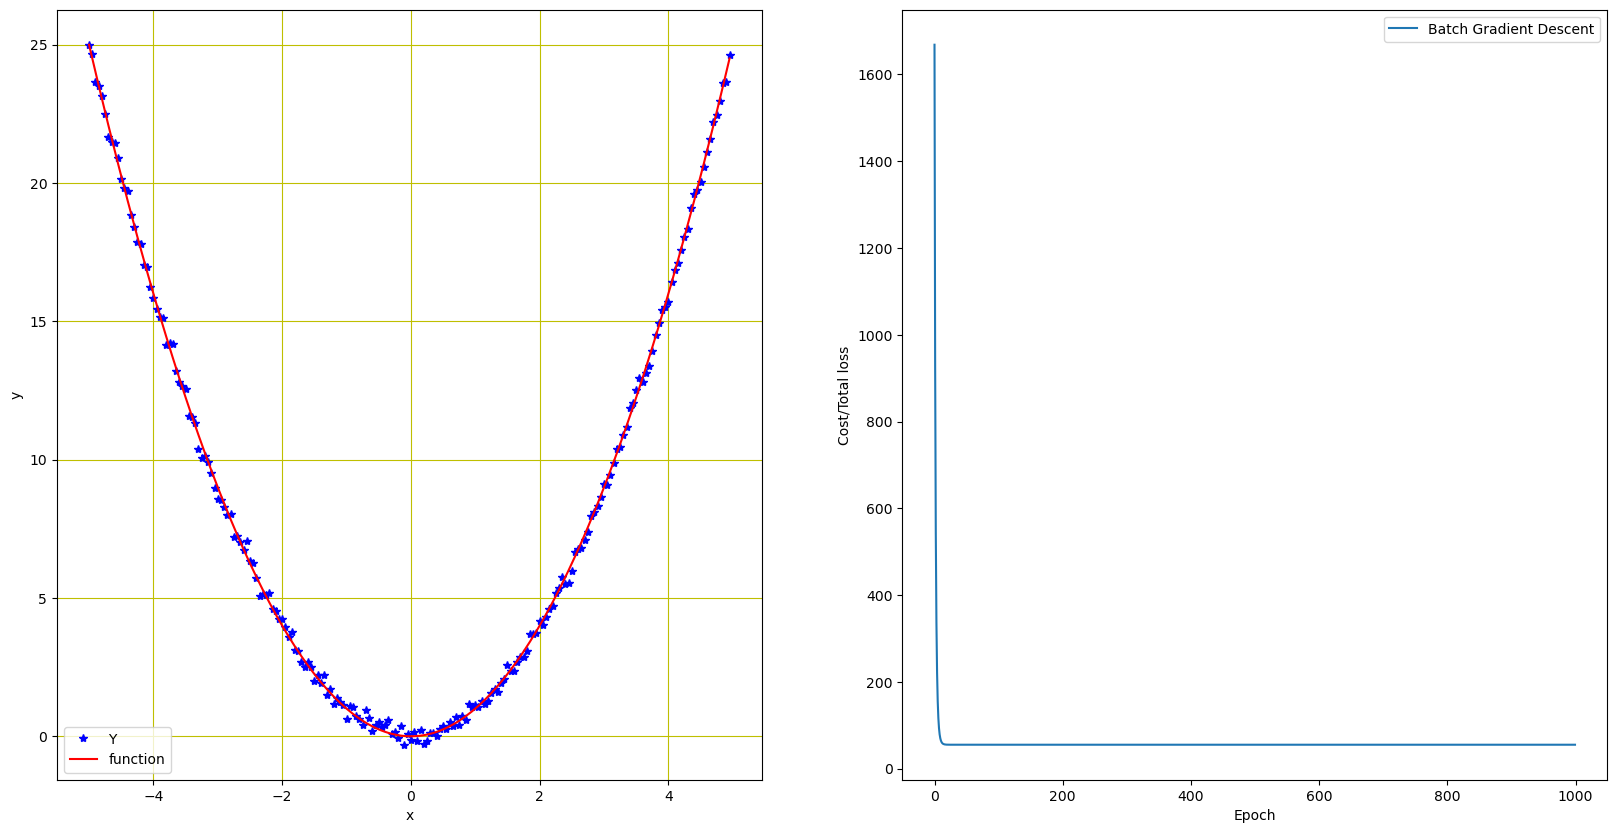

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# produce the data point with linear function
X = torch.arange(-5, 5, 0.05).view(-1, 1)
func = X**2
# Gaussian noise is added to create the variable Y
Y = func + 0.2 * torch.randn(X.size())

# plot and visualize the data points 
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(X, Y, 'b*', label='Y')
ax1.plot(X, func, 'r', label='function')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid('True', color='y')

# define the forward function
def forward(x):
    return w * x + b

# define loss function with Mean Square Error (MSE)
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

#  initial parameters w and b
w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

#  other parameters 
step_size = 0.1
loss_BGD = []
n_iter = 1000

#Initial predictions 
print('Predict before training with BGD:',4.0,forward(4.0))

for i in range (n_iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_BGD.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting some values for understanding
    if i % 5 == 0:
        print('iteration: {}, \t loss: {}, \t weight: {}, \t bias: {}'.format(i, loss.item(), w.item(), b.item()))

#Predict y after updating w
print('Predict after training with BGD:', 4.0, forward(4.0))

# plot the figure (loss_BGD)
plt.plot(loss_BGD, label="Batch Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()



# Secondly, search the learnig rate between (0,1), and find the best learning rate for the **5-2**.

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

# Define Hyperparameters
# set img_size = (28,28) ---> 28*28=784 pixels in total
input_size = 784 
# number of nodes at hidden layer
hidden_size = 500
# number of output classes discrete range [0,9]
num_classes = 10 

# number of times which the entire dataset is passed throughout the model
num_epochs = 30 

# the size of input data took for one iteration
batch_size = 1000

# # learning rate 
# lr = 1e-3  


In [3]:
# Download MNIST data
train_data = datasets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = datasets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor(), download = True)

# Split dataset with DataLoader, train dataset and test dataset
train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size, 
                                      shuffle = False)

# Use GPU, if the GPU is available, otherwise use the CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


x_train,y_train = next(iter(train_gen))
print(x_train.size())



torch.Size([1000, 1, 28, 28])


In [4]:
# Define neural network model
class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()  # Relu activation function, you can also use others like Tanh, Sigmold, etc.
    self.fc2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out
  
# Build the model of neural network 

net = Net(input_size, hidden_size, num_classes)
# feed net to device
net.to(device)

print(net)


Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [5]:
# Define neural network model
class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()  # Relu activation function, you can also use others like Tanh, Sigmold, etc.
    self.fc2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out
  
# Build the model of neural network 

net = Net(input_size, hidden_size, num_classes)
# feed net to device
net.to(device)

print(net)

[0.0001 0.0011 0.0021 0.0031 0.0041 0.0051 0.0061 0.0071 0.0081 0.0091]


In [6]:
import copy

# Define loss function
loss_function = nn.CrossEntropyLoss()

# Learning rate search
lr_list = np.arange(0.0001, 0.01, 0.001)
num_epochs_per_lr = 5  # Train for a few epochs with each LR

# Store results for each LR
lr_results = []

# Save initial model state (not needed specifically, you could initiate the model every time in teh loop to avoid this)
initial_model_state = copy.deepcopy(net.state_dict())

for lr in lr_list:
    print(f"\n{'='*50}")
    print(f"Testing Learning Rate: {lr:.4f}")
    print(f"{'='*50}")
    
    # Reset model to initial state
    net.load_state_dict(copy.deepcopy(initial_model_state))
    
    # Create optimizer with current LR
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    
    # Lists for this LR
    epoch_losses = []
    epoch_accuracies = []
    
    # Train for several epochs with this LR
    for epoch in range(num_epochs_per_lr):
        net.train()
        epoch_loss = 0
        
        for i, (images, labels) in enumerate(train_gen):
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
            
            optimizer.zero_grad()
            outputs = net(images)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        # Average loss for epoch
        avg_loss = epoch_loss / len(train_gen)
        
        # Evaluate on test set
        net.eval()
        correct = 0
        total = 0

        # this is important to not update the weights aka keep training
        with torch.no_grad():
            for images, labels in test_gen:
                images = Variable(images.view(-1, 28*28))
                labels = Variable(labels)
                
                outputs = net(images)
                _, predicted = torch.max(outputs, 1)
                
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        
        accuracy = 100 * correct / total
        
        epoch_losses.append(avg_loss)
        epoch_accuracies.append(accuracy)
        
        print(f"Epoch {epoch+1}/{num_epochs_per_lr} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")
    
    # Store results for this LR (use final epoch's metrics)
    lr_results.append({
        'lr': lr,
        'final_loss': epoch_losses[-1],
        'final_accuracy': epoch_accuracies[-1],
        'best_accuracy': max(epoch_accuracies),
        'all_losses': epoch_losses,
        'all_accuracies': epoch_accuracies
    })
    
    print(f"LR {lr:.4f} - Final Accuracy: {epoch_accuracies[-1]:.2f}%, Best Accuracy: {max(epoch_accuracies):.2f}%")



Testing Learning Rate: 0.0001
Epoch 1/5 - Loss: 1.8882, Accuracy: 80.79%
Epoch 2/5 - Loss: 1.0819, Accuracy: 85.68%
Epoch 3/5 - Loss: 0.6842, Accuracy: 88.35%
Epoch 4/5 - Loss: 0.5223, Accuracy: 89.66%
Epoch 5/5 - Loss: 0.4406, Accuracy: 90.40%
LR 0.0001 - Final Accuracy: 90.40%, Best Accuracy: 90.40%

Testing Learning Rate: 0.0011
Epoch 1/5 - Loss: 0.6565, Accuracy: 91.64%
Epoch 2/5 - Loss: 0.2670, Accuracy: 93.46%
Epoch 3/5 - Loss: 0.2060, Accuracy: 94.69%
Epoch 4/5 - Loss: 0.1645, Accuracy: 95.45%
Epoch 5/5 - Loss: 0.1358, Accuracy: 96.12%
LR 0.0011 - Final Accuracy: 96.12%, Best Accuracy: 96.12%

Testing Learning Rate: 0.0021
Epoch 1/5 - Loss: 0.5139, Accuracy: 93.00%
Epoch 2/5 - Loss: 0.2144, Accuracy: 94.74%
Epoch 3/5 - Loss: 0.1497, Accuracy: 96.10%
Epoch 4/5 - Loss: 0.1152, Accuracy: 96.68%
Epoch 5/5 - Loss: 0.0891, Accuracy: 97.24%
LR 0.0021 - Final Accuracy: 97.24%, Best Accuracy: 97.24%

Testing Learning Rate: 0.0031
Epoch 1/5 - Loss: 0.4566, Accuracy: 93.09%
Epoch 2/5 - Lo


Best Learning Rate: 0.0071
Best Accuracy: 97.96%


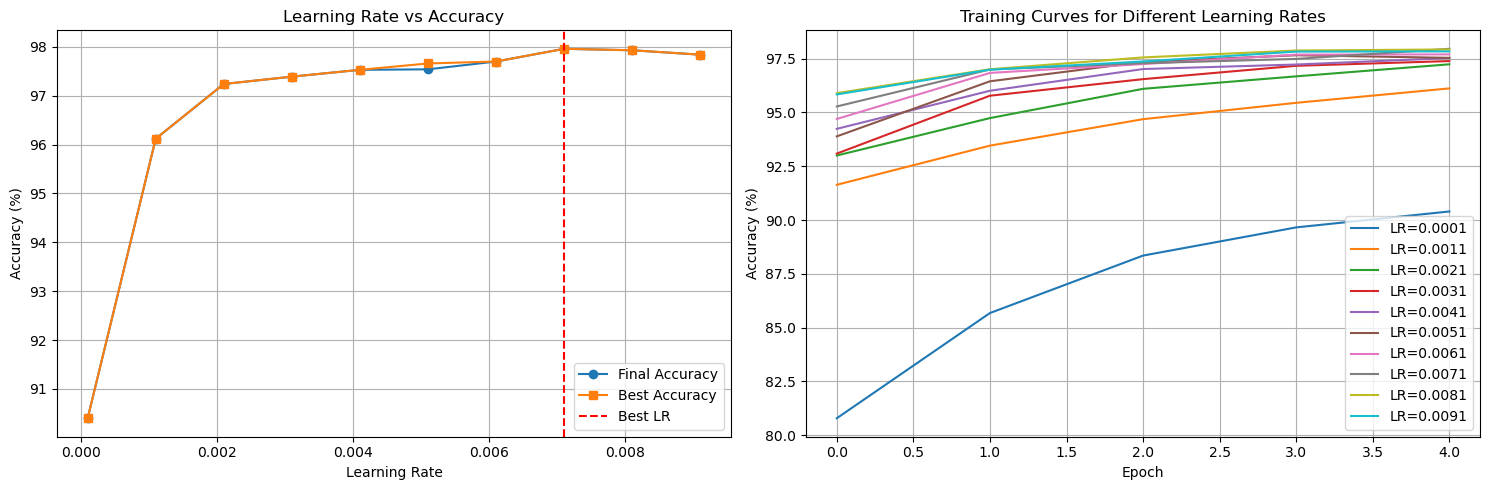

In [7]:
# Find best learning rate
best_lr_result = max(lr_results, key=lambda x: x['best_accuracy'])
print(f"\n{'='*50}")
print(f"Best Learning Rate: {best_lr_result['lr']:.4f}")
print(f"Best Accuracy: {best_lr_result['best_accuracy']:.2f}%")
print(f"{'='*50}")

# Visualize results
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot final accuracy vs LR
lrs = [r['lr'] for r in lr_results]
final_accs = [r['final_accuracy'] for r in lr_results]
best_accs = [r['best_accuracy'] for r in lr_results]

ax1.plot(lrs, final_accs, 'o-', label='Final Accuracy')
ax1.plot(lrs, best_accs, 's-', label='Best Accuracy')
ax1.axvline(best_lr_result['lr'], color='r', linestyle='--', label='Best LR')
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Learning Rate vs Accuracy')
ax1.legend()
ax1.grid(True)

# Plot training curves for each LR
for result in lr_results:
    ax2.plot(result['all_accuracies'], label=f"LR={result['lr']:.4f}")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training Curves for Different Learning Rates')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Lastly, using the Fashion MNIST dataset, how can you improve the accuracy?
Please explore any method to achieve a much higher accuracy. For example, you can change the network model by add more layers, tune hypaerparameters, or any other ideas to obtain a better results.


In [ ]:
import torchvision
import matplotlib.pyplot as plt
from torch import nn, optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [10]:
# load dataset
train_set = torchvision.datasets.FashionMNIST(root = './data/FashionMNIST', download = True,
                                              train = True, transform = transforms.Compose([transforms.ToTensor(),]))
test_set = torchvision.datasets.FashionMNIST(root = './data/FashionMNIST', download=True,
                                             train=False, transform = transforms.Compose([transforms.ToTensor()]))

# split to train loader
train_loader = DataLoader(dataset=train_set,batch_size=100,shuffle=True) # training set shuffle the data
test_loader = DataLoader(dataset=test_set,batch_size=50,shuffle=False) # testing set fix the data order



In [11]:

# define the model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1,10,5)    # Convolutional layer
        self.conv2 = nn.Conv2d(10,20,3)

        self.fc1 = nn.Linear(20*10*10,500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):     
        input_size = x.size(0)
        # in: batch*1*28*28, out: batch*10*24*24(28-5+1)
        x = self.conv1(x)
        # out: batch*10*24*24
        x = F.relu(x)
        # in: batch*10*24*24, out: batch*10*12*12
        x = F.max_pool2d(x,2,2)

        # in: batch*10*12*12, out: batch*20*10*10 (12-3+1)
        x = self.conv2(x)
        x = F.relu(x)

        # 20*10*10 = 2000
        x = x.view(input_size,-1)

        # in: batch*2000  out:batch*500
        x = self.fc1(x)
        x = F.relu(x)

        # in:batch*500 out:batch*10
        x = self.fc2(x)
        return F.log_softmax(x)
    
# create the object for model CNN
net= CNN()
print(net)

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=2000, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [12]:
# define the parameters
learning_rate = 1e-3
batch_size = 60
epochs = 20

#loss = F.nll_loss(output, target)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent

print(len(train_loader.dataset))
print(len(test_loader.dataset))

60000
10000


In [13]:
#  train the model
correct = 0
loss_list = []
for i in range(1,epochs+1):
   print(f"Epoch {i}\n-------------------------------")
   net.train()
   for batch_idx, (data, target) in enumerate(train_loader):
      
      optimizer.zero_grad()
      output = net(data)

       # we use this specific function because we compute the log_softmax within the final layer of network
      loss = F.nll_loss(output, target) # negative log likelihood loss used for classification
      loss.backward()
      optimizer.step()
   loss_list.append(loss.data)
   print('iteration: {}, \t loss: {}'.format(i, loss.item()))



Epoch 1
-------------------------------


/private/tmp/nix-shell-85918-1234613358/ipykernel_86000/203897878.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


iteration: 1, 	 loss: 0.506527304649353
Epoch 2
-------------------------------
iteration: 2, 	 loss: 0.4195097088813782
Epoch 3
-------------------------------
iteration: 3, 	 loss: 0.22967331111431122
Epoch 4
-------------------------------
iteration: 4, 	 loss: 0.1713988482952118
Epoch 5
-------------------------------
iteration: 5, 	 loss: 0.16353997588157654
Epoch 6
-------------------------------
iteration: 6, 	 loss: 0.13937297463417053
Epoch 7
-------------------------------
iteration: 7, 	 loss: 0.23169240355491638
Epoch 8
-------------------------------
iteration: 8, 	 loss: 0.12320028990507126
Epoch 9
-------------------------------
iteration: 9, 	 loss: 0.15391303598880768
Epoch 10
-------------------------------
iteration: 10, 	 loss: 0.09540252387523651
Epoch 11
-------------------------------
iteration: 11, 	 loss: 0.051298584789037704
Epoch 12
-------------------------------
iteration: 12, 	 loss: 0.19587849080562592
Epoch 13
-------------------------------
iteration: 1

In [ ]:
# plot the figure 
fig = plt.figure(figsize=(20, 10))

plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
correct = 0
# x_test,y_test = next(iter(test_loader))
# print(len(x_test))

with torch.no_grad():
    for data, target in test_loader:
    
        outputs = net(data)
        _, predicted = torch.max(outputs.data, 1)
    
        correct += (predicted == target).sum().item()
    
        print('Test accuracy: {}/{} ({:.0f}%)\n'.format(correct, len(test_loader.dataset),
                                                        100. * correct / len(test_loader.dataset)))